<a href="https://colab.research.google.com/github/Brynlai/DataScienceHeartDiseaseAssignment/blob/Bryan/NoRemoveOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# @title
!pip install ucimlrepo
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Fetch the Heart Disease dataset from the UCI ML Repository
heart_disease_bunch = fetch_ucirepo(id=45)

# Print the fetched dataset
print(heart_disease_bunch)

{'data': {'ids': None, 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1   

In [38]:
# Load into DataFrame
heart_disease = pd.DataFrame(data=heart_disease_bunch.data.features,
                             columns=heart_disease_bunch.data.feature_names,
                             index=heart_disease_bunch.data.ids)

heart_disease = pd.concat([heart_disease, heart_disease_bunch.data.targets], axis=1)
df = heart_disease
print(df.info())

df = df.rename(columns={'num': 'target'})
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

# Print the updated DataFrame
print(df.head())
print(df.shape)
# Iterate over each column in the DataFrame
for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
Column: age
age
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8


In [39]:
column_names = {
    "age": "Age",
    "sex": "Gender",
    "cp": "ChestPainType",
    "trestbps": "RestingBP",
    "fbs": "FastBloodSugar",
    "restecg": "RestingECG",
    "exang": "ExerciseAngina",
    "slope": "ExerciseSlope",
    "ca": "MajorVessels",
    "thal": "ThalliumStress",
    "target": "HeartDisease",
    "chol": "SerumCholesterol",
    "thalach": "MaxHeartRate",
    "oldpeak": "OldPeak"
}
df.rename(columns=column_names, inplace=True)
# print("------- Renamed df:", df)

# Export the entire DataFrame to a CSV file (including all rows and columns)
# heart_disease.to_csv('heart_disease_full.csv', index=False)
# Iterate over each column in the DataFrame


In [40]:
# DATA CLEANING : Dealing with duplicate observation
# Check for any duplicate observation
duplicate_rows = df.duplicated()
print("Number of duplicate rows before:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows again
duplicate_rows = df.duplicated()
print("Number of duplicate rows after:", duplicate_rows.sum())


Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [41]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Replace missing values with the median of each column, only if the column is numerical
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numerical
        df[column] = df[column].fillna(df[column].median())

# Check if there are any missing values left
missing_values_after = df.isnull().sum()
print("Missing values after replacing with medians:")
print(missing_values_after)
for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

Missing values in each column:
Age                 0
Gender              0
ChestPainType       0
RestingBP           0
SerumCholesterol    0
FastBloodSugar      0
RestingECG          0
MaxHeartRate        0
ExerciseAngina      0
OldPeak             0
ExerciseSlope       0
MajorVessels        4
ThalliumStress      2
HeartDisease        0
dtype: int64
Missing values after replacing with medians:
Age                 0
Gender              0
ChestPainType       0
RestingBP           0
SerumCholesterol    0
FastBloodSugar      0
RestingECG          0
MaxHeartRate        0
ExerciseAngina      0
OldPeak             0
ExerciseSlope       0
MajorVessels        0
ThalliumStress      0
HeartDisease        0
dtype: int64
Column: Age
Age
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    12
61     8
62    11
63   

Outliers in RestingBP: [200, 192]
Outliers in SerumCholesterol: [417, 407, 564, 409]
Outliers in MaxHeartRate: [71]
Outliers in OldPeak: [6.2, 5.6]


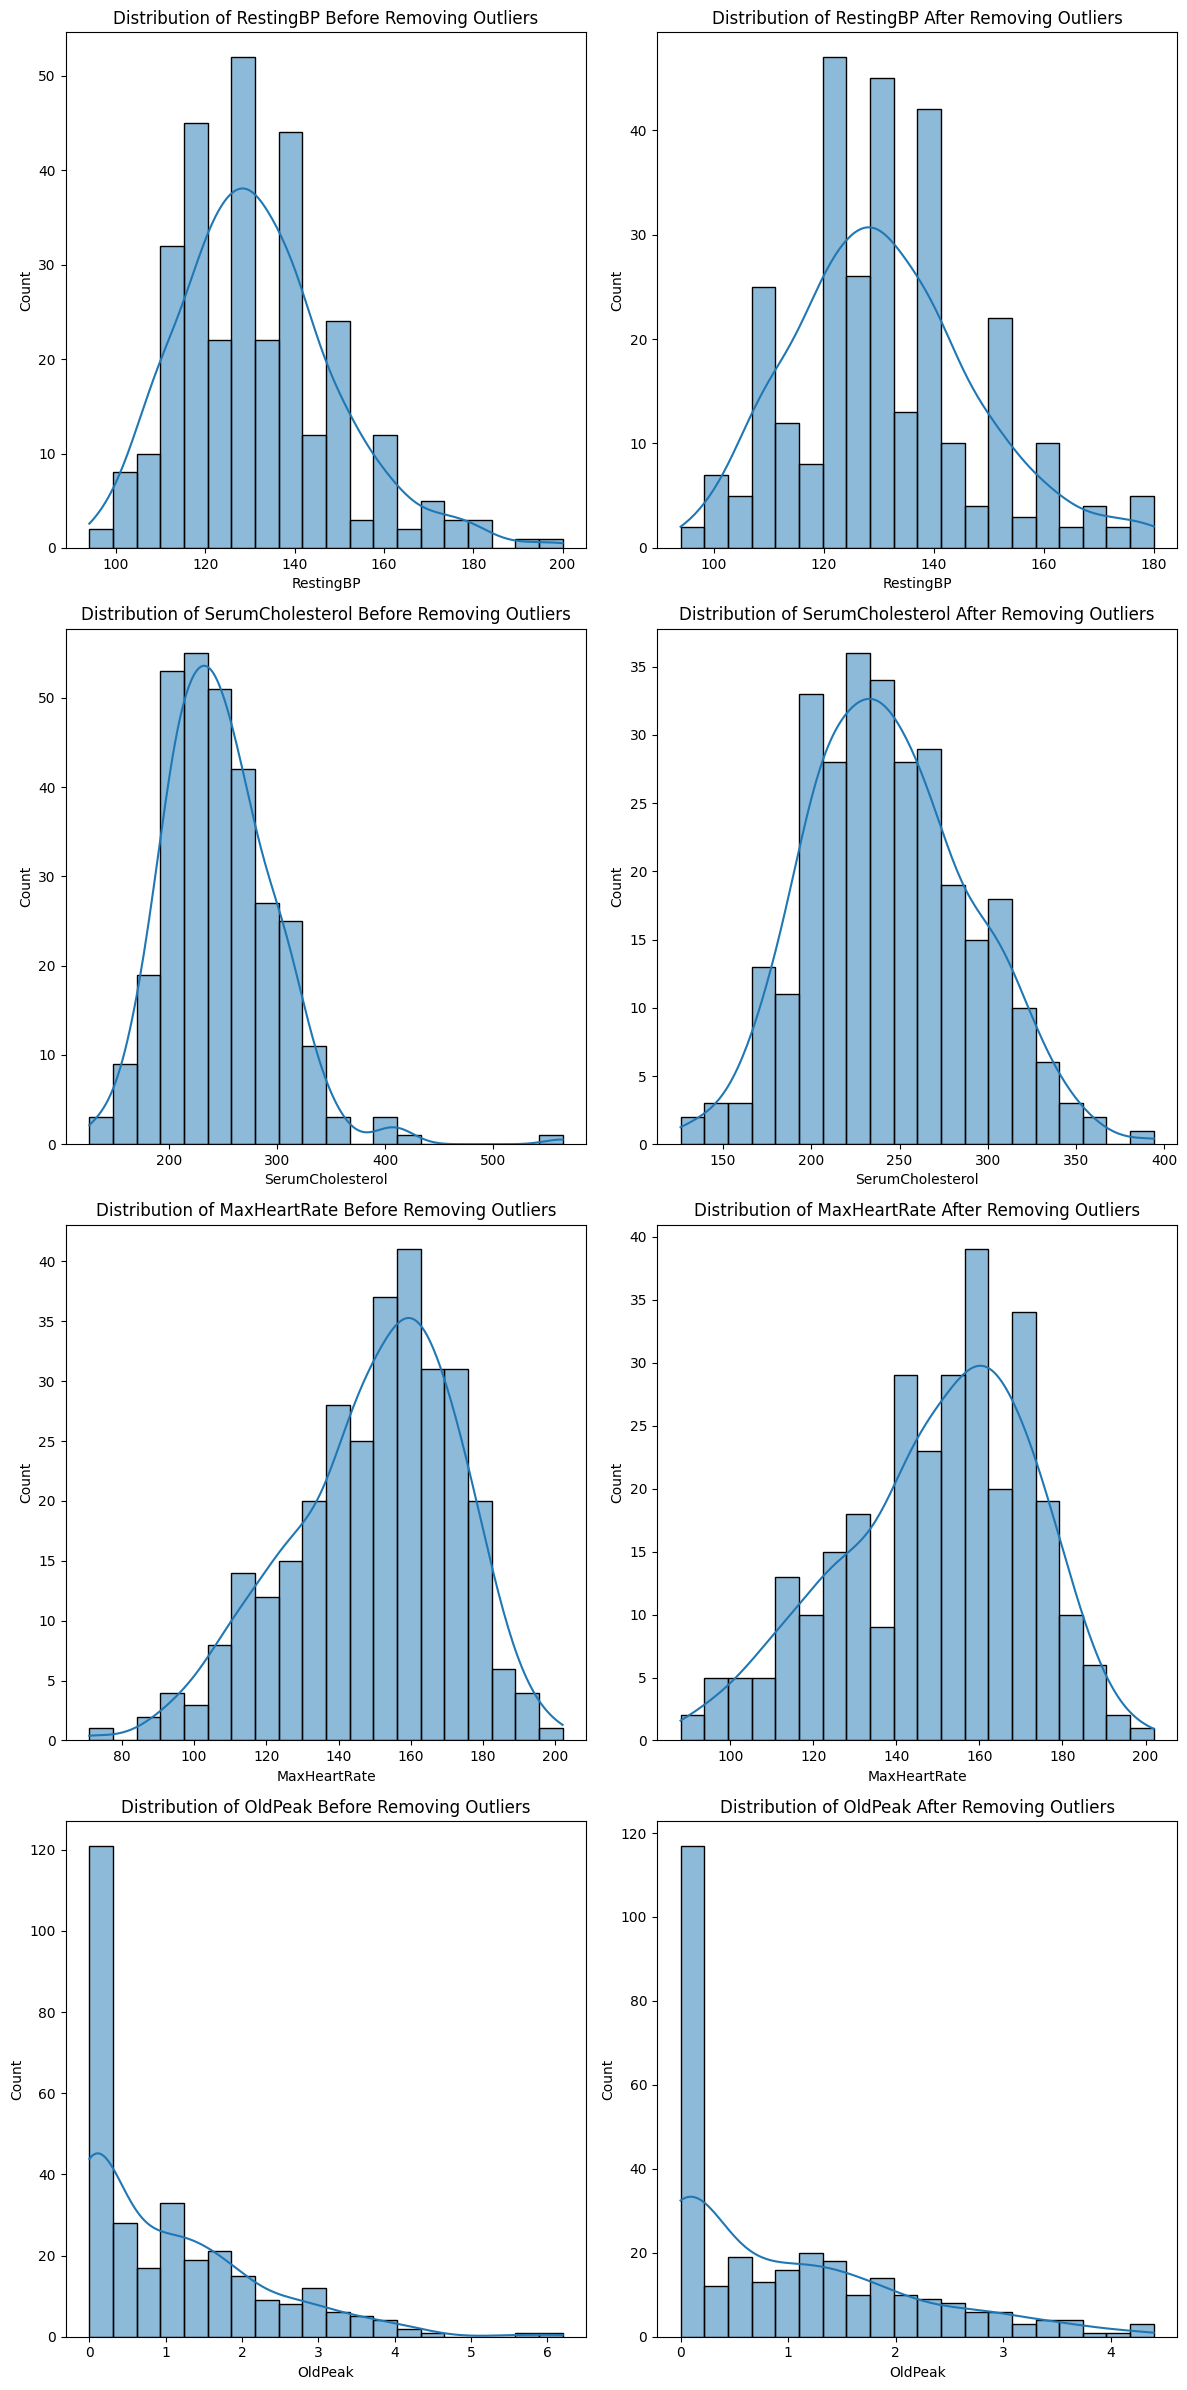

Column: Age
Age
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    12
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
dtype: int64

Column: Gender
Gender
0     97
1    206
dtype: int64

Column: ChestPainType
ChestPainType
1     23
2     50
3     86
4    144
dtype: int64

Column: RestingBP
RestingBP
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    12
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
158     1
160    11
164     1
165     1
170

In [42]:
def remove_outliers(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        z_scores = np.abs((df[column] - mean) / std)
        outlier_indices = z_scores >= threshold
        outliers[column] = df[column][outlier_indices].tolist()
        df = df[~outlier_indices]
    return df, outliers

# Specify the columns to check for outliers
columns_to_check = ['RestingBP', 'SerumCholesterol', 'MaxHeartRate', 'OldPeak']

# Remove outliers from the DataFrame and print the outliers
df_cleaned, outliers = remove_outliers(df, columns_to_check)
for column, outlier_list in outliers.items():
    print(f"Outliers in {column}: {outlier_list}")

# Create distribution plots before and after removing outliers
fig, axes = plt.subplots(nrows=len(columns_to_check), ncols=2, figsize=(12, 6*len(columns_to_check)))
for i, column in enumerate(columns_to_check):
    sns.histplot(df[column], ax=axes[i, 0], kde=True, bins=20)
    axes[i, 0].set_title(f'Distribution of {column} Before Removing Outliers')
    sns.histplot(df_cleaned[column], ax=axes[i, 1], kde=True, bins=20)
    axes[i, 1].set_title(f'Distribution of {column} After Removing Outliers')
plt.tight_layout()
plt.show()

for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

In [43]:
# # Define bins for age
# age_bins = [10, 20, 30, 40, 50, 60, np.inf]
# age_labels = [1, 2, 3, 4, 5, 6]  # Assign numerical labels
# df['Age_binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# # Define bins for resting blood pressure
# trestbps_bins = [0, 100, 120, 140, 160, np.inf]
# trestbps_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
# df['RestingBP_binned'] = pd.cut(df['RestingBP'], bins=trestbps_bins, labels=trestbps_labels, include_lowest=True)

# # Define bins for serum cholesterol
# chol_bins = [0, 160, 200, 240, 280, np.inf]
# chol_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
# df['SerumCholesterol_binned'] = pd.cut(df['SerumCholesterol'], bins=chol_bins, labels=chol_labels, include_lowest=True)

# # Define bins for maximum heart rate achieved
# thalach_bins = [0, 90, 120, 150, 180, np.inf]
# thalach_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
# df['MaxHeartRate_binned'] = pd.cut(df['MaxHeartRate'], bins=thalach_bins, labels=thalach_labels, include_lowest=True)

# # Define bins for ST depression induced by exercise
# oldpeak_bins = [0, 0.5, 1.5, 2.5, 3.5, np.inf]
# oldpeak_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
# df['OldPeak_binned'] = pd.cut(df['OldPeak'], bins=oldpeak_bins, labels=oldpeak_labels, include_lowest=True)

# # Drop original numerical columns if desired
# df = df.drop(['Age', 'RestingBP', 'SerumCholesterol', 'MaxHeartRate', 'OldPeak'], axis=1)

# for column in df.columns:
#     # Group by the column and get the size of each group
#     group_sizes = df.groupby(column).size()
#     print(f"Column: {column}")
#     print(group_sizes)
#     print()  # Empty line for better readability

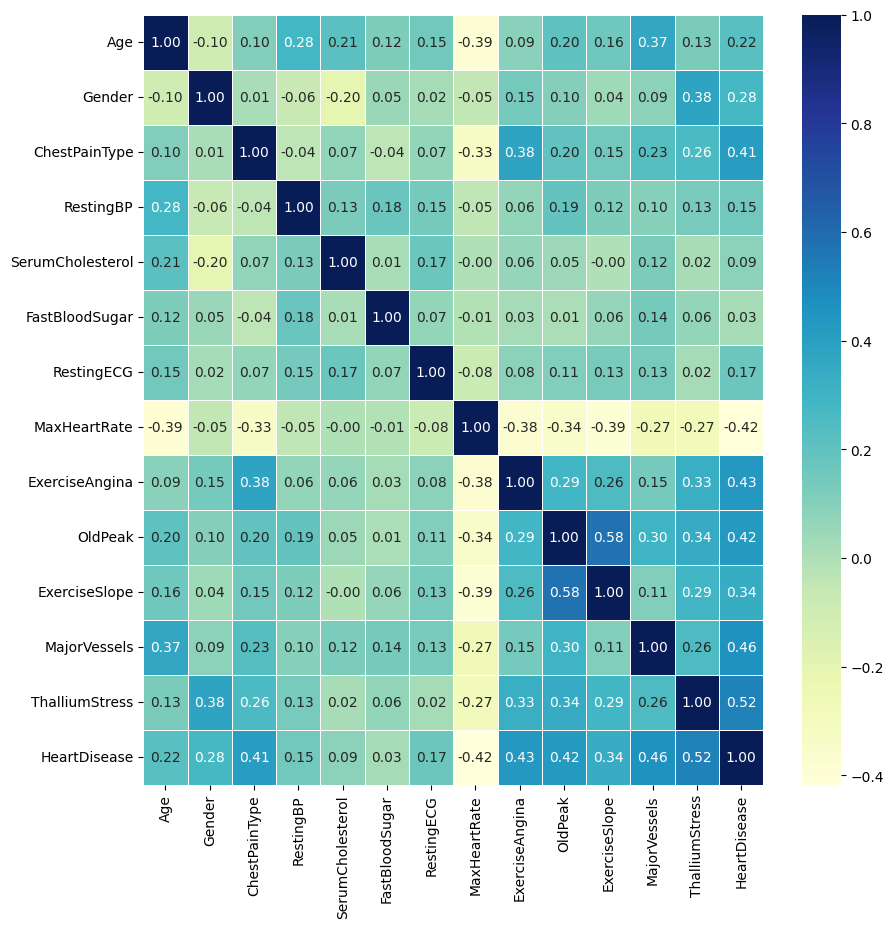

In [44]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()
plt.show()

In [49]:
# Prepare the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

np.random.seed(564)
test_sizes = {}
for i in range(15, 23):
    test_sizes[f"{i}%"] = i / 100

count = 0
best_models = {}
for sizeOfT, testSize in test_sizes.items():
    print(f"\n---Iteration {count} Test size: {sizeOfT}:")
    count += 1

    # Split the data using the fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=200)

    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, solver='sag'),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "SVM": SVC()
    }

    modelPerformance = {}

    # Perform k-fold cross-validation
    for model_name, model in models.items():
        # Use 5-fold cross-validation as an example
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        avg_cv_score = cv_scores.mean()
        print(f"{model_name} with Cross-Validation Accuracy: {avg_cv_score:.3f}")

        # Train and evaluate the model on the test set
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} with Test Accuracy: {test_accuracy:.3f}")
        modelPerformance[model_name] = (avg_cv_score, test_accuracy)

    # Find and print the best model for this test size based on cross-validation score
    best_model_name = max(modelPerformance, key=lambda x: modelPerformance[x])
    best_model_cv_accuracy, best_model_test_accuracy = modelPerformance[best_model_name]
    print(f"Best Model: {best_model_name} with Cross-Validation Accuracy: {best_model_cv_accuracy:.3f} and Test Accuracy: {best_model_test_accuracy:.3f}")

    # Store the best model for each test size
    best_models[sizeOfT] = (best_model_name, best_model_cv_accuracy, best_model_test_accuracy)

# Print the best models for each test size
print("\nBest Models for Each Test Size:")
for test_size, (best_model, cv_accuracy, test_accuracy) in best_models.items():
    print(f" Test Size: {test_size}, Best Model:\n {best_model} with Cross-Validation Accuracy: {cv_accuracy:.3f} and Test Accuracy: {test_accuracy:.3f}")


---Iteration 0 Test size: 15%:
Logistic Regression with Cross-Validation Accuracy: 0.826
Logistic Regression with Test Accuracy: 0.848
Decision Tree with Cross-Validation Accuracy: 0.790
Decision Tree with Test Accuracy: 0.804
Random Forest with Cross-Validation Accuracy: 0.825
Random Forest with Test Accuracy: 0.848
Gradient Boosting with Cross-Validation Accuracy: 0.786
Gradient Boosting with Test Accuracy: 0.783
SVM with Cross-Validation Accuracy: 0.810
SVM with Test Accuracy: 0.826
Best Model: Logistic Regression with Cross-Validation Accuracy: 0.826 and Test Accuracy: 0.848

---Iteration 1 Test size: 16%:
Logistic Regression with Cross-Validation Accuracy: 0.831
Logistic Regression with Test Accuracy: 0.837
Decision Tree with Cross-Validation Accuracy: 0.779
Decision Tree with Test Accuracy: 0.776
Random Forest with Cross-Validation Accuracy: 0.807
Random Forest with Test Accuracy: 0.837
Gradient Boosting with Cross-Validation Accuracy: 0.791
Gradient Boosting with Test Accuracy: